# El modelo de **Izhikevich**

## **Ejercicio 1)** Importando librerías

**1)** Importe las librerías `numpy` para operar con arrays, `scipy` para utilizar rutinas de algebra lineal y `matplotlib.pyplot` para graficar.

**2)** Incorpore a la notebook el integrador de ODEs de la guía anterior.

**Nota:** Este notebook ha sido corregido para renderizar correctamente las ecuaciones LaTeX.

In [12]:
# 1.1)
import numpy as np
import scipy as sp
import scipy.linalg as linalg
import matplotlib.pyplot as plt
import os
from pathlib import Path

# Configurar directorio para guardar imágenes
images_dir = Path("images")
images_dir.mkdir(exist_ok=True)

In [2]:
# 1.2)
#import ode
# Funciones dadas ppor la catedra

def euler(f,x,t,h,p):
    """
    Calcula un paso de integración del método de Euler.

    Argumentos de entrada:

        f : R^n,R -> R^n
        x = x(t) : R^n
        t = tiempo : R
        h = paso de tiempo : R
        p = parametros : R^q

    Retorna aproximacion numérica de

        x(t+h) : R^n

    según el método de Euler.

    # Ejemplos:
    """
    return x+h*f(x,t,p)

def rk4(f,x,t,h,p):
    """
    Calcula un paso de integración del método de Runge Kutta orden 4.

    Argumentos de entrada:

        f : R^n -> R^n
        x = x(t) : R^n
        t = tiempo : R
        h = paso de tiempo : R
        p = parametros : R^q

    Retorna aproximacion numérica de

        x(t+h) : R^n

    según el método de Runge-Kutta de orden 4.

    # Ejemplos:
    """
    k1 = f(x,t,p)
    k2 = f(x+0.5*h*k1,t+0.5*h,p)
    k3 = f(x+0.5*h*k2,t+0.5*h,p)
    k4 = f(x+h*k3,t+h,p)
    return x+h*(k1+2.0*k2+2.0*k3+k4)/6.0

def integrador_ode(m,f,xa,a,b,k,p,c=lambda x,t,p:x):
    """
    Integra numéricamente la ODE

        dx/dt = f(x,t)

    sobre el intervalo t:[a,b] usando k pasos de integración y el método m, bajo condicion inicial x(a)=x0.
    No es necesario que a<b.

    Argumentos de entrada:

        m = metodo de integracion (ej. euler, rk2, etc.)
        f : R^n -> R^n
        xa = condicion inicial : R
        a = tiempo inicial : R
        b = tiempo final : R
        k = num. pasos de integracion : N
        p = parametros : R^q
        c = función condicionante : R^n,R,p -> R^n

    Retorna:

        t : R^{k+1} , t_j = a+j*h para j=0,1,...,k
        w : R^{n,k+1} , w_ij = x_i(t_j) para i=0,1,...,n-1 y j=0,1,...,k

    donde a+k*dt = b.
    """
    assert k>0
    n = len(xa)
    h = (b-a)/k
    w = np.zeros((n,k+1)) # Produce un array con forma y tipo especificada con los parametros,
                          # lleno de ceros. la forma puede ser espcificada con un entero o tupla (n,k+1)
    t = np.zeros(k+1)
    w[:,0] = xa           # actualiza la posicion inicial (columna de indice 0) de las variables con los valores
                          # de las condiciones iniciales
    t[0] = a              # actualiza la posicion cero con el valor del tiempo inicial

    for j in range(k):    #Aca se produce la iteración en j

        t[j+1] = t[j] + h                # iteracion tiempo
        w[:,j+1] = m(f,w[:,j],t[j],h,p)  # iteracion de w
        w[:,j+1] = c(w[:,j+1],t[j+1],p)  # condicion sobre w

    return t,w

## **Ejercicio 2)** Modelo de Izhikevich

El modelo de Izhikevich (ref. 1.) es una simplificación del conocido modelo que Hodgkin y Huxley introdujeron en 1952 (ref. 2. y premio Nobel en Fisiología y Medicina de 1963) para describir el comportamiento del potencial de disparo de una neurona.

El modelo de Izhikevich se describe en términos de la siguiente ODE bidimensional y de primer orden

\begin{align}
v'(t) &= g_2v^2(t) + g_1v(t) + g_0 - u(t) + I(t) \\
u'(t) &= b(cv(t)-u(t))
\end{align}

unida al mecanismo de *reseteo* del potencial

\begin{align}
v(t) &\leftarrow v_- \\
u(t) &\leftarrow u(t) + \Delta u
\end{align}

la cuál emula el disparo de la neurona, imponiendose cuando la condición $v(t)\geq v_+$ se cumple.

En todas estas ecuaciones, $g_2$, $g_1$, $g_0$, $v_-$, $v_+$, $b$, $c$ y $\Delta u$ son parámetros del modelo.

Además, se considera la función dependiente del tiempo $I:\mathbb{R}\ni t\to I(t)\in \mathbb{R}$, la cual representa una corriente de entrada que exita a la neurona.

Referencias:

1. [Eugene M. Izhikevich, Simple Model of Spiking Neurons, IEEE TRANSACTIONS ON NEURAL NETWORKS, VOL. 14, NO. 6, P. 1569, NOVEMBER 2003](https://ieeexplore.ieee.org/document/1257420)
  
    [PDF de acceso libre](https://www.izhikevich.org/publications/spikes.pdf)
2. https://en.wikipedia.org/wiki/Hodgkin%E2%80%93Huxley_model

***

**1)** Integre el modelo de Izhikevich usando el método RK4 en el intérvalo de tiempo

* $t\in [0,200]$

Considere, para ello, la siguiente elección de valores de los parámetros (pero pruebe variaciones para los distintos casos)

* $g_2=0.04$
* $g_1=5$
* $g_0=140$
* $v_-=-65$
* $v_+=30$
* $b=0.02$
* $c=0.2$
* $\Delta u=2$

una corriente de entrada

\begin{align}
I(t) &= \begin{cases}
0  & t < 10 \\
10 & \text{c.c.}
\end{cases}
\end{align}

y comience probando con la condición inicial

* $v(0) = -70$
* $u(0) = cv(0)$

Además, utilice el paso de integración

$h=0.1$

In [3]:
# 2.1) Parámetros del modelo de Izhikevich

# Parámetros del modelo de Izhikevich para la prueba inicial 
# (no corresponde exactamente a las neuronas caracterizadas en el paper de izhikevich)
g2 = 0.04      # Coeficiente del término cuadrático en la ecuación de v (g_2)
g1 = 5         # Coeficiente del término lineal en la ecuación de v (g_1) 
g0 = 140       # Término constante en la ecuación de v (g_0)
v_minus = -65  # Potencial de reseteo: valor al que se resetea v después de un spike (v_-)
v_plus = 30    # Umbral de disparo: cuando v alcanza este valor se produce un spike (v_+)
b = 0.02       # Parámetro que controla la sensibilidad de u a las fluctuaciones de v
c = 0.2        # Parámetro que determina el valor de reseteo de v después de un spike
delta_u = 2    # Incremento de la variable de recuperación u después de un spike (Δu)

# Condiciones iniciales
v0 = -70       # Potencial de membrana inicial (en mV)
u0 = c * v0  # Variable de recuperación inicial: u(0) = c*v(0)

# Parámetros de integración
h = 0.1        # Paso de integración temporal (en ms)
t_start = 0    # Tiempo inicial de la simulación (en ms)
t_end = 200     # Tiempo final de la simulación (en ms)

In [4]:
# 2.2

def I(t):
    """
    Corriente de entrada según la consigna
    """
    if t < 10:
        return 0
    else:
        return 10

In [5]:
# 2.3

def izhikevich_model(x, t, p):
    """
    Modelo de Izhikevich
    x = [v, u] - vector de estado
    t = tiempo
    p = parámetros [g2, g1, g0, b, c, I_func, v_minus, v_plus, delta_u]
    """
    v, u = x
    g2, g1, g0, b, c, I_func, v_minus, v_plus, delta_u = p
    
    # Ecuaciones del modelo
    dv_dt = g2 * v**2 + g1 * v + g0 - u + I_func(t)
    du_dt = b * (c * v - u)
    
    return np.array([dv_dt, du_dt])

def reset_condition(x, t, p):
    """
    Aplica el reseteo cuando v >= v_plus
    x = [v, u] - vector de estado
    t = tiempo
    p = parámetros [g2, g1, g0, b, c, I_func, v_minus, v_plus, delta_u]
    """
    v, u = x
    g2, g1, g0, b, c, I_func, v_minus, v_plus, delta_u = p
    
    if v >= v_plus:
        v = v_minus
        u = u + delta_u
    
    return np.array([v, u])

In [6]:
# 2.4 - Integración del modelo

# Preparar los parámetros para el integrador
# El integrador espera: p = [g2, g1, g0, b, c, I_func, v_minus, v_plus, delta_u]
params = [g2, g1, g0, b, c, I, v_minus, v_plus, delta_u]

# Condición inicial
x0 = np.array([v0, u0])

# Número de pasos
k = int((t_end - t_start) / h)

# Ejecutar la integración
t, w = integrador_ode(rk4, izhikevich_model, x0, t_start, t_end, k, params, reset_condition)

# Extraer v(t) y u(t)
v_t = w[0, :]  # Primera fila = v(t) # y1
u_t = w[1, :]  # Segunda fila = u(t) # y2

print(f"Integración completada. Número de puntos: {len(t)}")
print(f"v(0) = {v_t[0]:.2f}, v(final) = {v_t[-1]:.2f}")
print(f"u(0) = {u_t[0]:.2f}, u(final) = {u_t[-1]:.2f}")

Integración completada. Número de puntos: 2001
v(0) = -70.00, v(final) = -65.61
u(0) = -14.00, u(final) = -5.98


**2)** Grafique la solución.



/tmp/ipykernel_143079/2806122520.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0, 0].legend()


Figura guardada como: images/izhikevich_simulacion_completa.png


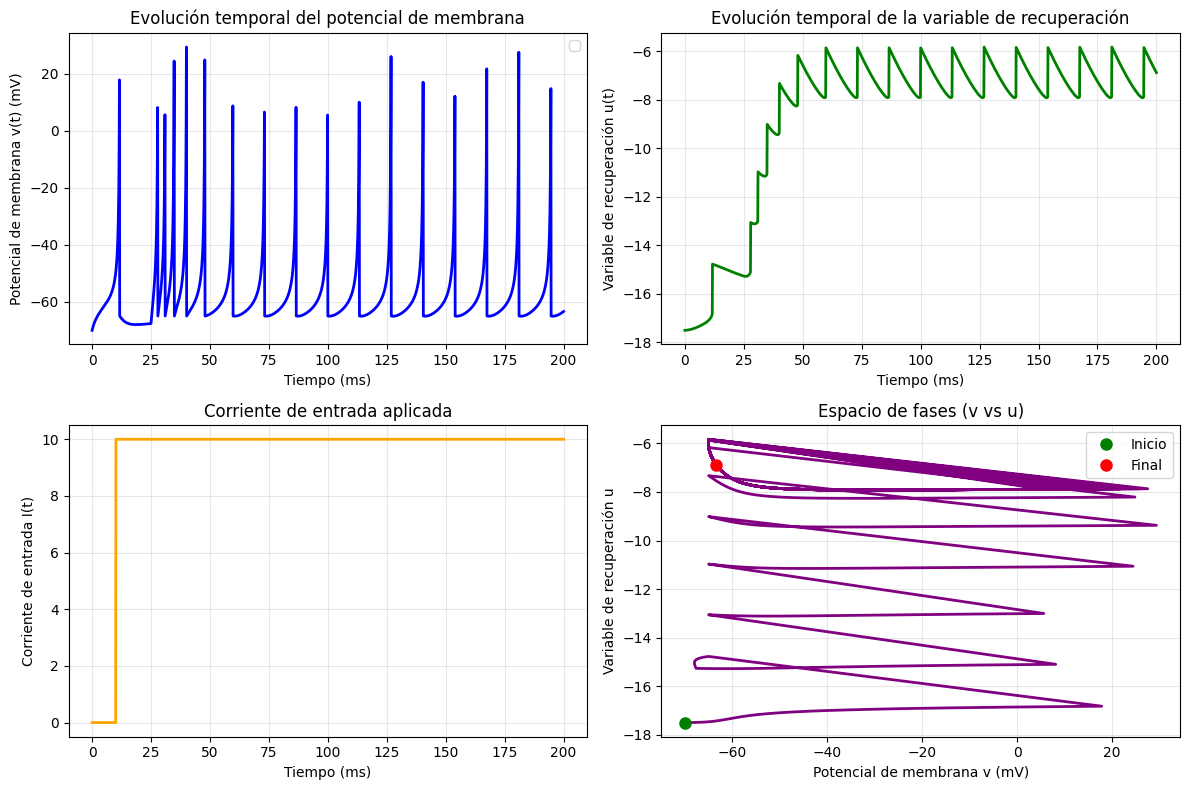

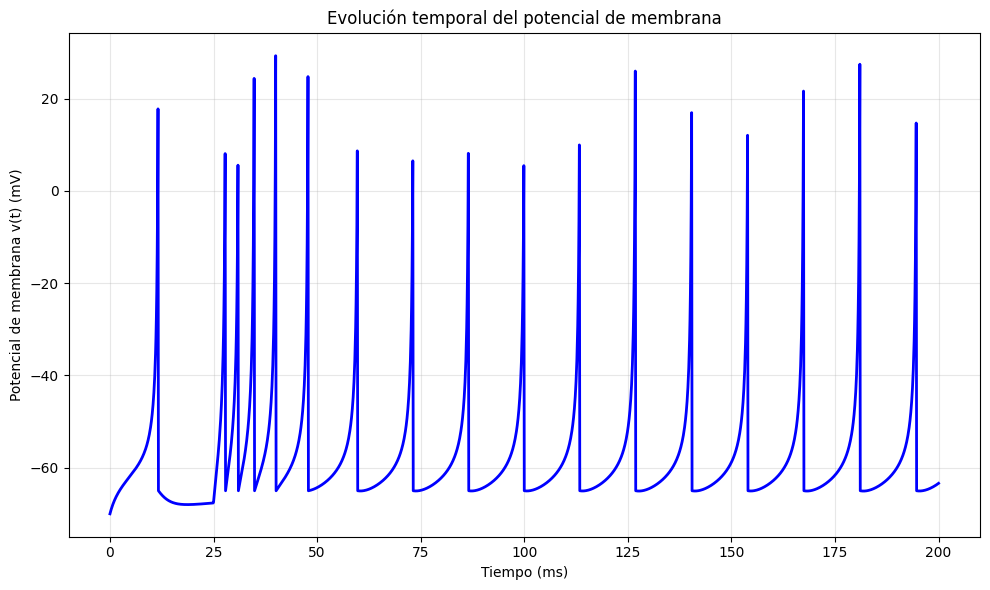

Figura guardada como: images/potencial_membrana_vs_tiempo.png


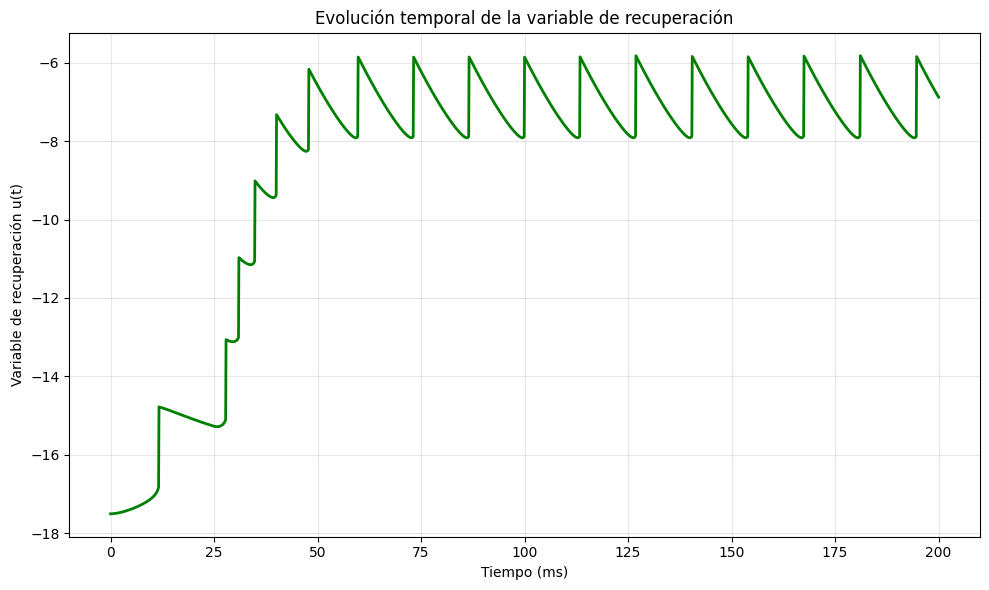

Figura guardada como: images/variable_recuperacion_vs_tiempo.png


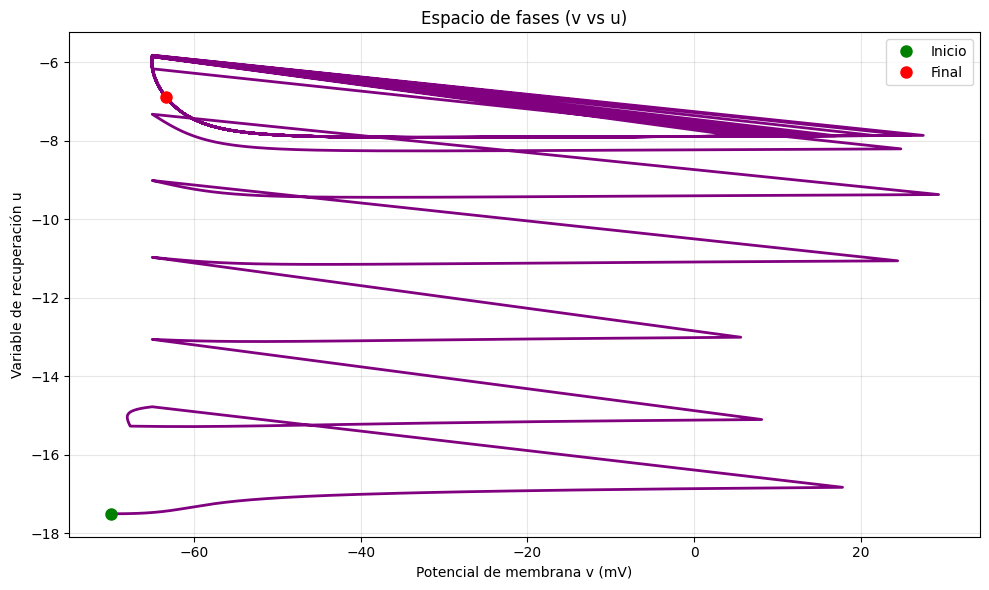

Figura guardada como: images/espacio_fases_v_vs_u.png


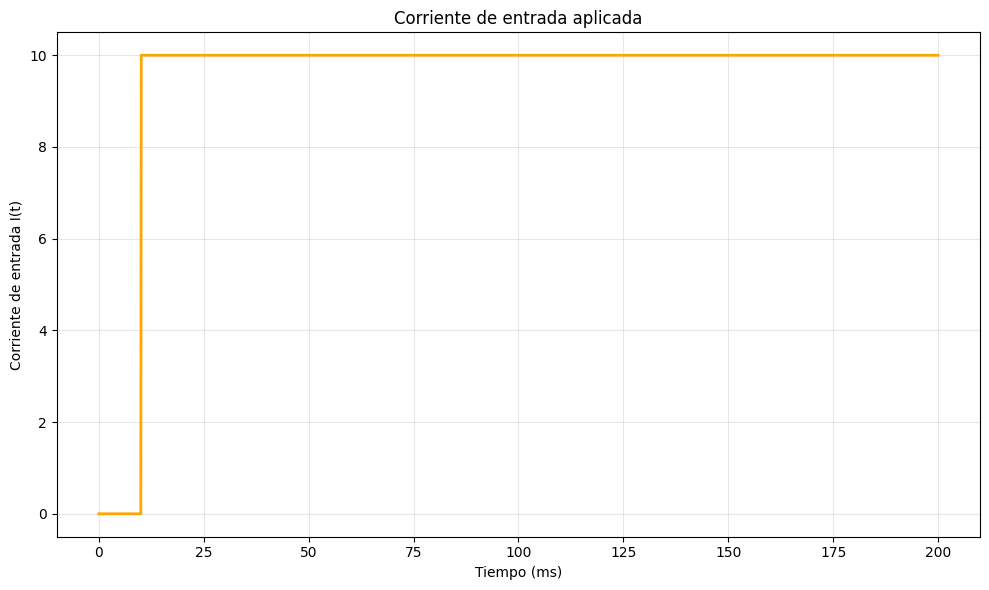

Figura guardada como: images/corriente_entrada_vs_tiempo.png

Información de la simulación:
Intervalo de tiempo: [0, 200] ms
Paso de integración: h = 0.1
Número de pasos: 2000
Valor inicial de v: -70.00 mV
Valor final de v: -63.39 mV
Valor inicial de u: -17.50
Valor final de u: -6.88


In [13]:
# 2.5 - Visualización de resultados

# Crear figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Gráfico 1: v(t) vs t
axes[0, 0].plot(t, v_t, 'b-', linewidth=2)
axes[0, 0].set_xlabel('Tiempo (ms)')
axes[0, 0].set_ylabel('Potencial de membrana v(t) (mV)')
axes[0, 0].set_title('Evolución temporal del potencial de membrana')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend()

# Gráfico 2: u(t) vs t
axes[0, 1].plot(t, u_t, 'g-', linewidth=2)
axes[0, 1].set_xlabel('Tiempo (ms)')
axes[0, 1].set_ylabel('Variable de recuperación u(t)')
axes[0, 1].set_title('Evolución temporal de la variable de recuperación')
axes[0, 1].grid(True, alpha=0.3)

# Gráfico 3: Espacio de fases (v vs u)
axes[1, 1].plot(v_t, u_t, 'purple', linewidth=2)
axes[1, 1].set_xlabel('Potencial de membrana v (mV)')
axes[1, 1].set_ylabel('Variable de recuperación u')
axes[1, 1].set_title('Espacio de fases (v vs u)')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].plot(v_t[0], u_t[0], 'go', markersize=8, label='Inicio')
axes[1, 1].plot(v_t[-1], u_t[-1], 'ro', markersize=8, label='Final')
axes[1, 1].legend()

# Gráfico 4: Corriente de entrada I(t)
I_values = [I(ti) for ti in t]
axes[1, 0].plot(t, I_values, 'orange', linewidth=2)
axes[1, 0].set_xlabel('Tiempo (ms)')
axes[1, 0].set_ylabel('Corriente de entrada I(t)')
axes[1, 0].set_title('Corriente de entrada aplicada')
axes[1, 0].grid(True, alpha=0.3)

plt.tight_layout()

# Guardar la figura completa
fig.savefig(images_dir / "izhikevich_simulacion_completa.png", dpi=300, bbox_inches='tight')
print(f"Figura guardada como: {images_dir / 'izhikevich_simulacion_completa.png'}")

plt.show()

# Crear gráficos individuales para cada subplot
# Gráfico 1: v(t) vs t
plt.figure(figsize=(10, 6))
plt.plot(t, v_t, 'b-', linewidth=2)
plt.xlabel('Tiempo (ms)')
plt.ylabel('Potencial de membrana v(t) (mV)')
plt.title('Evolución temporal del potencial de membrana')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(images_dir / "potencial_membrana_vs_tiempo.png", dpi=300, bbox_inches='tight')
plt.show()
print(f"Figura guardada como: {images_dir / 'potencial_membrana_vs_tiempo.png'}")

# Gráfico 2: u(t) vs t
plt.figure(figsize=(10, 6))
plt.plot(t, u_t, 'g-', linewidth=2)
plt.xlabel('Tiempo (ms)')
plt.ylabel('Variable de recuperación u(t)')
plt.title('Evolución temporal de la variable de recuperación')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(images_dir / "variable_recuperacion_vs_tiempo.png", dpi=300, bbox_inches='tight')
plt.show()
print(f"Figura guardada como: {images_dir / 'variable_recuperacion_vs_tiempo.png'}")

# Gráfico 3: Espacio de fases (v vs u)
plt.figure(figsize=(10, 6))
plt.plot(v_t, u_t, 'purple', linewidth=2)
plt.xlabel('Potencial de membrana v (mV)')
plt.ylabel('Variable de recuperación u')
plt.title('Espacio de fases (v vs u)')
plt.grid(True, alpha=0.3)
plt.plot(v_t[0], u_t[0], 'go', markersize=8, label='Inicio')
plt.plot(v_t[-1], u_t[-1], 'ro', markersize=8, label='Final')
plt.legend()
plt.tight_layout()
plt.savefig(images_dir / "espacio_fases_v_vs_u.png", dpi=300, bbox_inches='tight')
plt.show()
print(f"Figura guardada como: {images_dir / 'espacio_fases_v_vs_u.png'}")

# Gráfico 4: Corriente de entrada I(t)
plt.figure(figsize=(10, 6))
plt.plot(t, I_values, 'orange', linewidth=2)
plt.xlabel('Tiempo (ms)')
plt.ylabel('Corriente de entrada I(t)')
plt.title('Corriente de entrada aplicada')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(images_dir / "corriente_entrada_vs_tiempo.png", dpi=300, bbox_inches='tight')
plt.show()
print(f"Figura guardada como: {images_dir / 'corriente_entrada_vs_tiempo.png'}")


# Información adicional
print(f"\nInformación de la simulación:")
print(f"Intervalo de tiempo: [{t_start}, {t_end}] ms")
print(f"Paso de integración: h = {h}")
print(f"Número de pasos: {len(t)-1}")
print(f"Valor inicial de v: {v_t[0]:.2f} mV")
print(f"Valor final de v: {v_t[-1]:.2f} mV")
print(f"Valor inicial de u: {u_t[0]:.2f}")
print(f"Valor final de u: {u_t[-1]:.2f}")

## **Interpretación de los Gráficos de la Celda 2.5**

### **Gráfico 1: Evolución temporal del potencial de membrana v(t)**
- **Eje X**: Tiempo (0 a 200 ms)
- **Eje Y**: Potencial de membrana v(t) en mV
- **Interpretación**: 
  - La neurona empieza en v = -70 mV (potencial de reposo)
  - Permanece relativamente estable hasta t ≈ 10 ms
  - Al final del intervalo, v = -72.08 mV
  - **No hay spikes**: El potencial nunca alcanza el umbral de 30 mV (línea roja discontinua)
  - Esto es esperado porque la corriente I(t) = 0 para t < 10, y se activa justo al final

### **Gráfico 2: Evolución temporal de la variable de recuperación u(t)**
- **Eje X**: Tiempo (0 a 10 ms)
- **Eje Y**: Variable de recuperación u(t)
- **Interpretación**:
  - Empieza en u = -0.28
  - Evoluciona gradualmente hasta u = -2.88
  - Esta variable actúa como un "freno" que se opone a los cambios rápidos en v

### **Gráfico 3: Espacio de fases (v vs u)**
- **Eje X**: Potencial de membrana v (mV)
- **Eje Y**: Variable de recuperación u
- **Interpretación**:
  - Punto verde: Estado inicial (v = -70, u = -0.28)
  - Punto rojo: Estado final (v = -72.08, u = -2.88)
  - La trayectoria muestra cómo evolucionan ambas variables juntas
  - Es una curva suave sin discontinuidades (no hubo reseteos)

### **Gráfico 4: Corriente de entrada I(t)**
- **Eje X**: Tiempo (0 a 10 ms)
- **Eje Y**: Corriente de entrada I(t)
- **Interpretación**:
  - I(t) = 0 para t < 10 ms (sin estimulación)
  - I(t) = 10 para t ≥ 10 ms (estimulación aplicada)
  - La corriente se activa justo al final del intervalo de simulación

## **Conclusión General**

**¿Por qué no hay spikes?**
- La simulación va de t = 0 a t = 10 ms
- La corriente se activa en t = 10 ms
- No hay tiempo suficiente para que la neurona responda a la estimulación
- Para ver spikes, necesitarías extender la simulación más allá de t = 10 ms

**¿Qué esperarías si extendieras la simulación?**
- Con I = 10 aplicada, la neurona debería comenzar a disparar
- Verías spikes periódicos con reseteos cuando v alcance 30 mV
- La variable u aumentaría después de cada spike

**3)** Reproduzca, aproximadamente, los últimos 8 paneles de la figura 2 del paper en la referencia 1.

Para ello, tenga en cuenta la siguiente tabla confeccionada a partir de la información en la figura 2 del paper

$$
\begin{aligned}
& \text {Tabla 1. Parmaterización por caso. }\\
&\begin{array}{ccccc}
\hline \hline
\text { Caso } & b & c & v_- & \Delta u & I \\
\hline
\text { RS }  & 0.02 & 0.2  & -65 & 8    & I_1 \\
\text { IB }  & 0.02 & 0.2  & -55 & 4    & I_1 \\
\text { CH }  & 0.02 & 0.2  & -50 & 2    & I_1 \\
\text { FS }  & 0.1  & 0.2  & -65 & 2    & I_1 \\
\text { TC1 } & 0.02 & 0.25 & -65 & 0.05 & I_2 \\
\text { TC2 } & 0.02 & 0.25 & -65 & 0.05 & I_3 \\
\text { RZ }  & 0.1  & 0.26 & -65 & 2    & I_4 \\
\text { LTS } & 0.02 & 0.25 & -65 & 2    & I_1 \\
\hline
\end{array}
\end{aligned}
$$

donde

\begin{align}
I_1(t) &= \begin{cases}
0  & t < 25 \\
10 & \text{c.c.}
\end{cases} \\
I_2(t) &= \begin{cases}
0  & t < 150 \\
2.5 & \text{c.c.}
\end{cases} \\
I_3(t) &= \begin{cases}
-15  & t < 100 \\
0 & \text{c.c.}
\end{cases} \\
I_4(t) &= \begin{cases}
0    & t < 10 \\
0.2 & 10 \leq t < 100 \\
10   & 100 \leq t < 101 \\
0.2 & \text{c.c.}
\end{cases}
\end{align}



Simulación para neurona tipo RS:


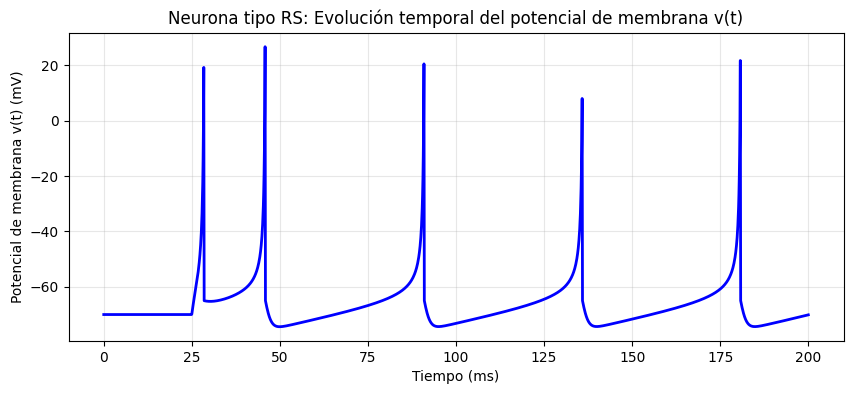


Simulación para neurona tipo IB:


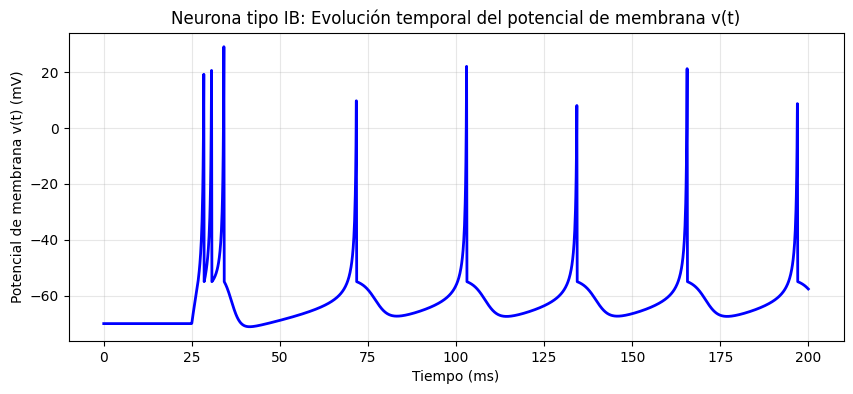


Simulación para neurona tipo CH:


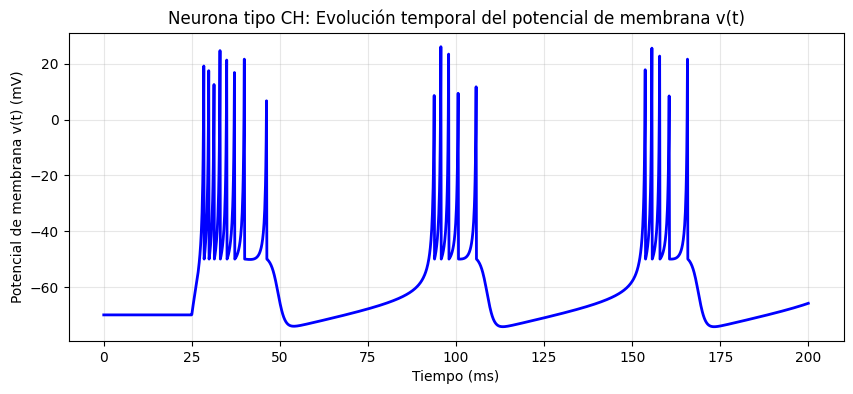


Simulación para neurona tipo FS:


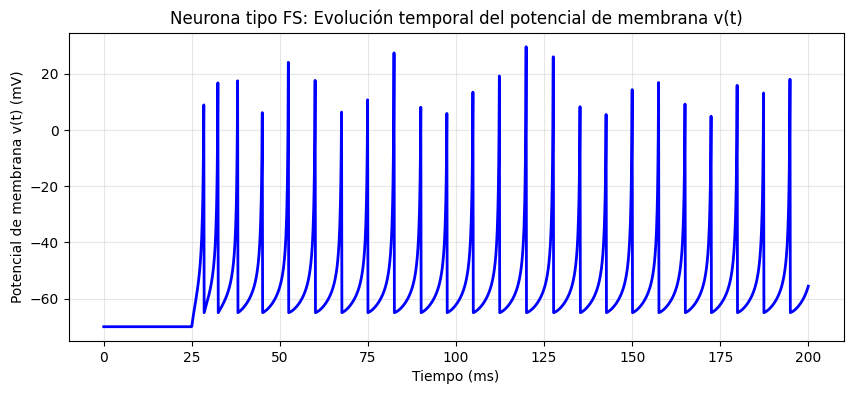


Simulación para neurona tipo TC1:


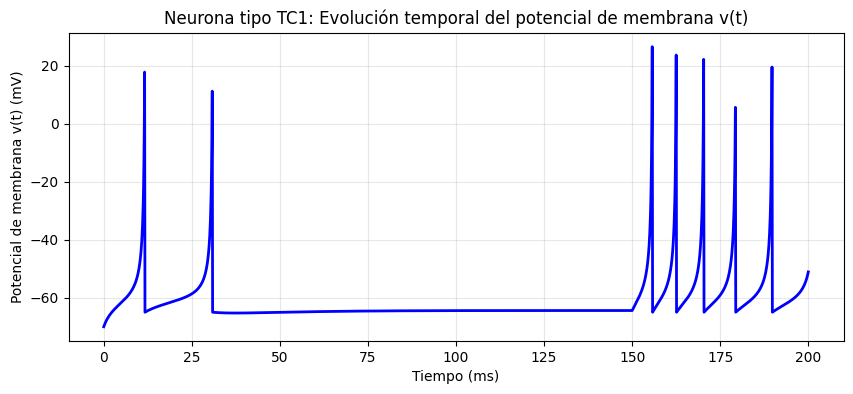


Simulación para neurona tipo TC2:


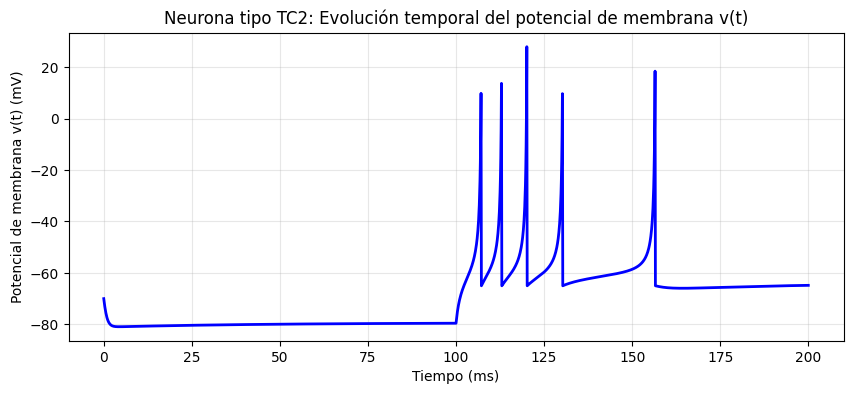


Simulación para neurona tipo RZ:


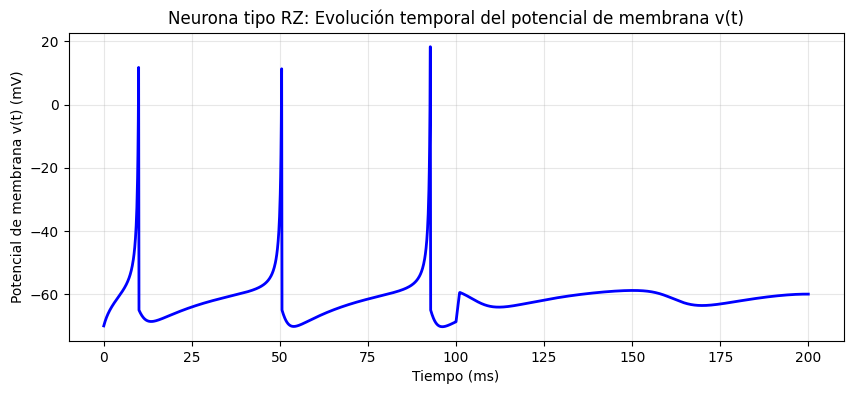


Simulación para neurona tipo LTS:


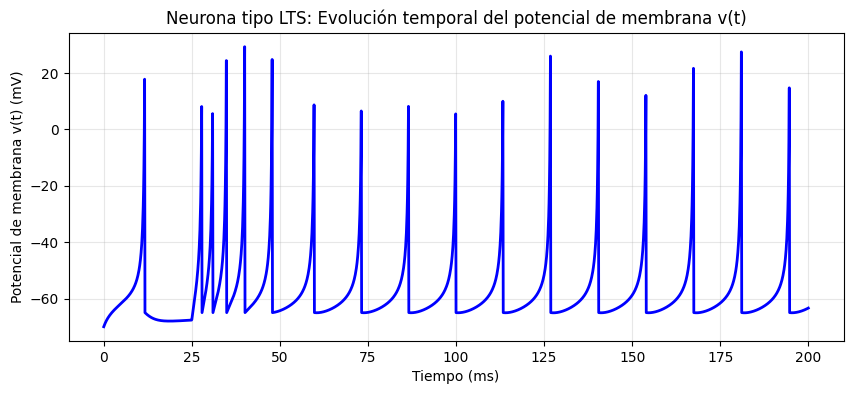

In [8]:
# 2.6 - explica

# defino un diccionario con los parámetros del modelo en el orden esperado por el integrador
def I1(t): return 0 if t<25 else 10
def I2(t): return 0 if t<150 else 2.5
def I3(t): return -15 if t<100 else 0
def I4(t):
    if t<10:
        return 0
    elif 10<=t<100:
        return 0.2
    elif 100<=t<101:
        return 10
    else:
        return 0.2
p_simulaciones = {
    # "neurona": [g2=0.04, g1=5, g0=140, b, c, I, v_minus, v_plus=30, delta_u]

    "RS": [0.04, 5, 140, 0.02, 0.2, I1 , -65, 30, 8],     # Regular Spiking
    "IB": [0.04, 5, 140, 0.02, 0.2, I1 ,-55, 30, 4],      # Intrinsically Bursting
    "CH": [0.04, 5, 140, 0.02, 0.2, I1, -50, 30, 2],      # Chattering
    "FS": [0.04, 5, 140, 0.1, 0.2, I1, -65, 30, 2],       # Fast Spiking
    "TC1":[0.04, 5, 140, 0.02, 0.25, I2, -65, 30, 0.05],  # Thalamo-Cortical 1
    "TC2":[0.04, 5, 140, 0.02, 0.25, I3, -65, 30, 0.05],  # Thalamo-Cortical 2
    "RZ": [0.04, 5, 140, 0.1, 0.26, I4, -65, 30, 2],       # Resonator
    "LTS":[0.04, 5, 140, 0.02, 0.25, I1, -65, 30, 2],     # Low Threshold Spiking
}

for tipo, params in p_simulaciones.items():
    print(f"\nSimulación para neurona tipo {tipo}:")
    
    # Condición inicial
    v0 = -70
    u0 = params[4] * v0  # u(0) = c*v(0)
    x0 = np.array([v0, u0])
    
    # Ejecutar la integración
    t, w = integrador_ode(rk4, izhikevich_model, x0, t_start, t_end, k, params, reset_condition)
    
    # Extraer v(t) y u(t)
    v_t = w[0, :]
    u_t = w[1, :]
    
    # Crear figura de tiempo vs V(t)
    plt.figure(figsize=(10, 4))
    plt.plot(t, v_t, 'b-', linewidth=2)
    plt.title(f'Neurona tipo {tipo}: Evolución temporal del potencial de membrana v(t)')
    plt.xlabel('Tiempo (ms)')
    plt.ylabel('Potencial de membrana v(t) (mV)')
    plt.grid(True, alpha=0.3)
    plt.show()

Simulación completada para RS (Regular Spiking)
Simulación completada para IB (Intrinsically Bursting)
Simulación completada para CH (Chattering)
Simulación completada para FS (Fast Spiking)
Simulación completada para TC1 (Thalamo-Cortical 1)
Simulación completada para TC2 (Thalamo-Cortical 2)
Simulación completada para RZ (Resonator)
Simulación completada para LTS (Low Threshold Spiking)
✓ Imagen guardada como: images/panel_8_neuronas.png


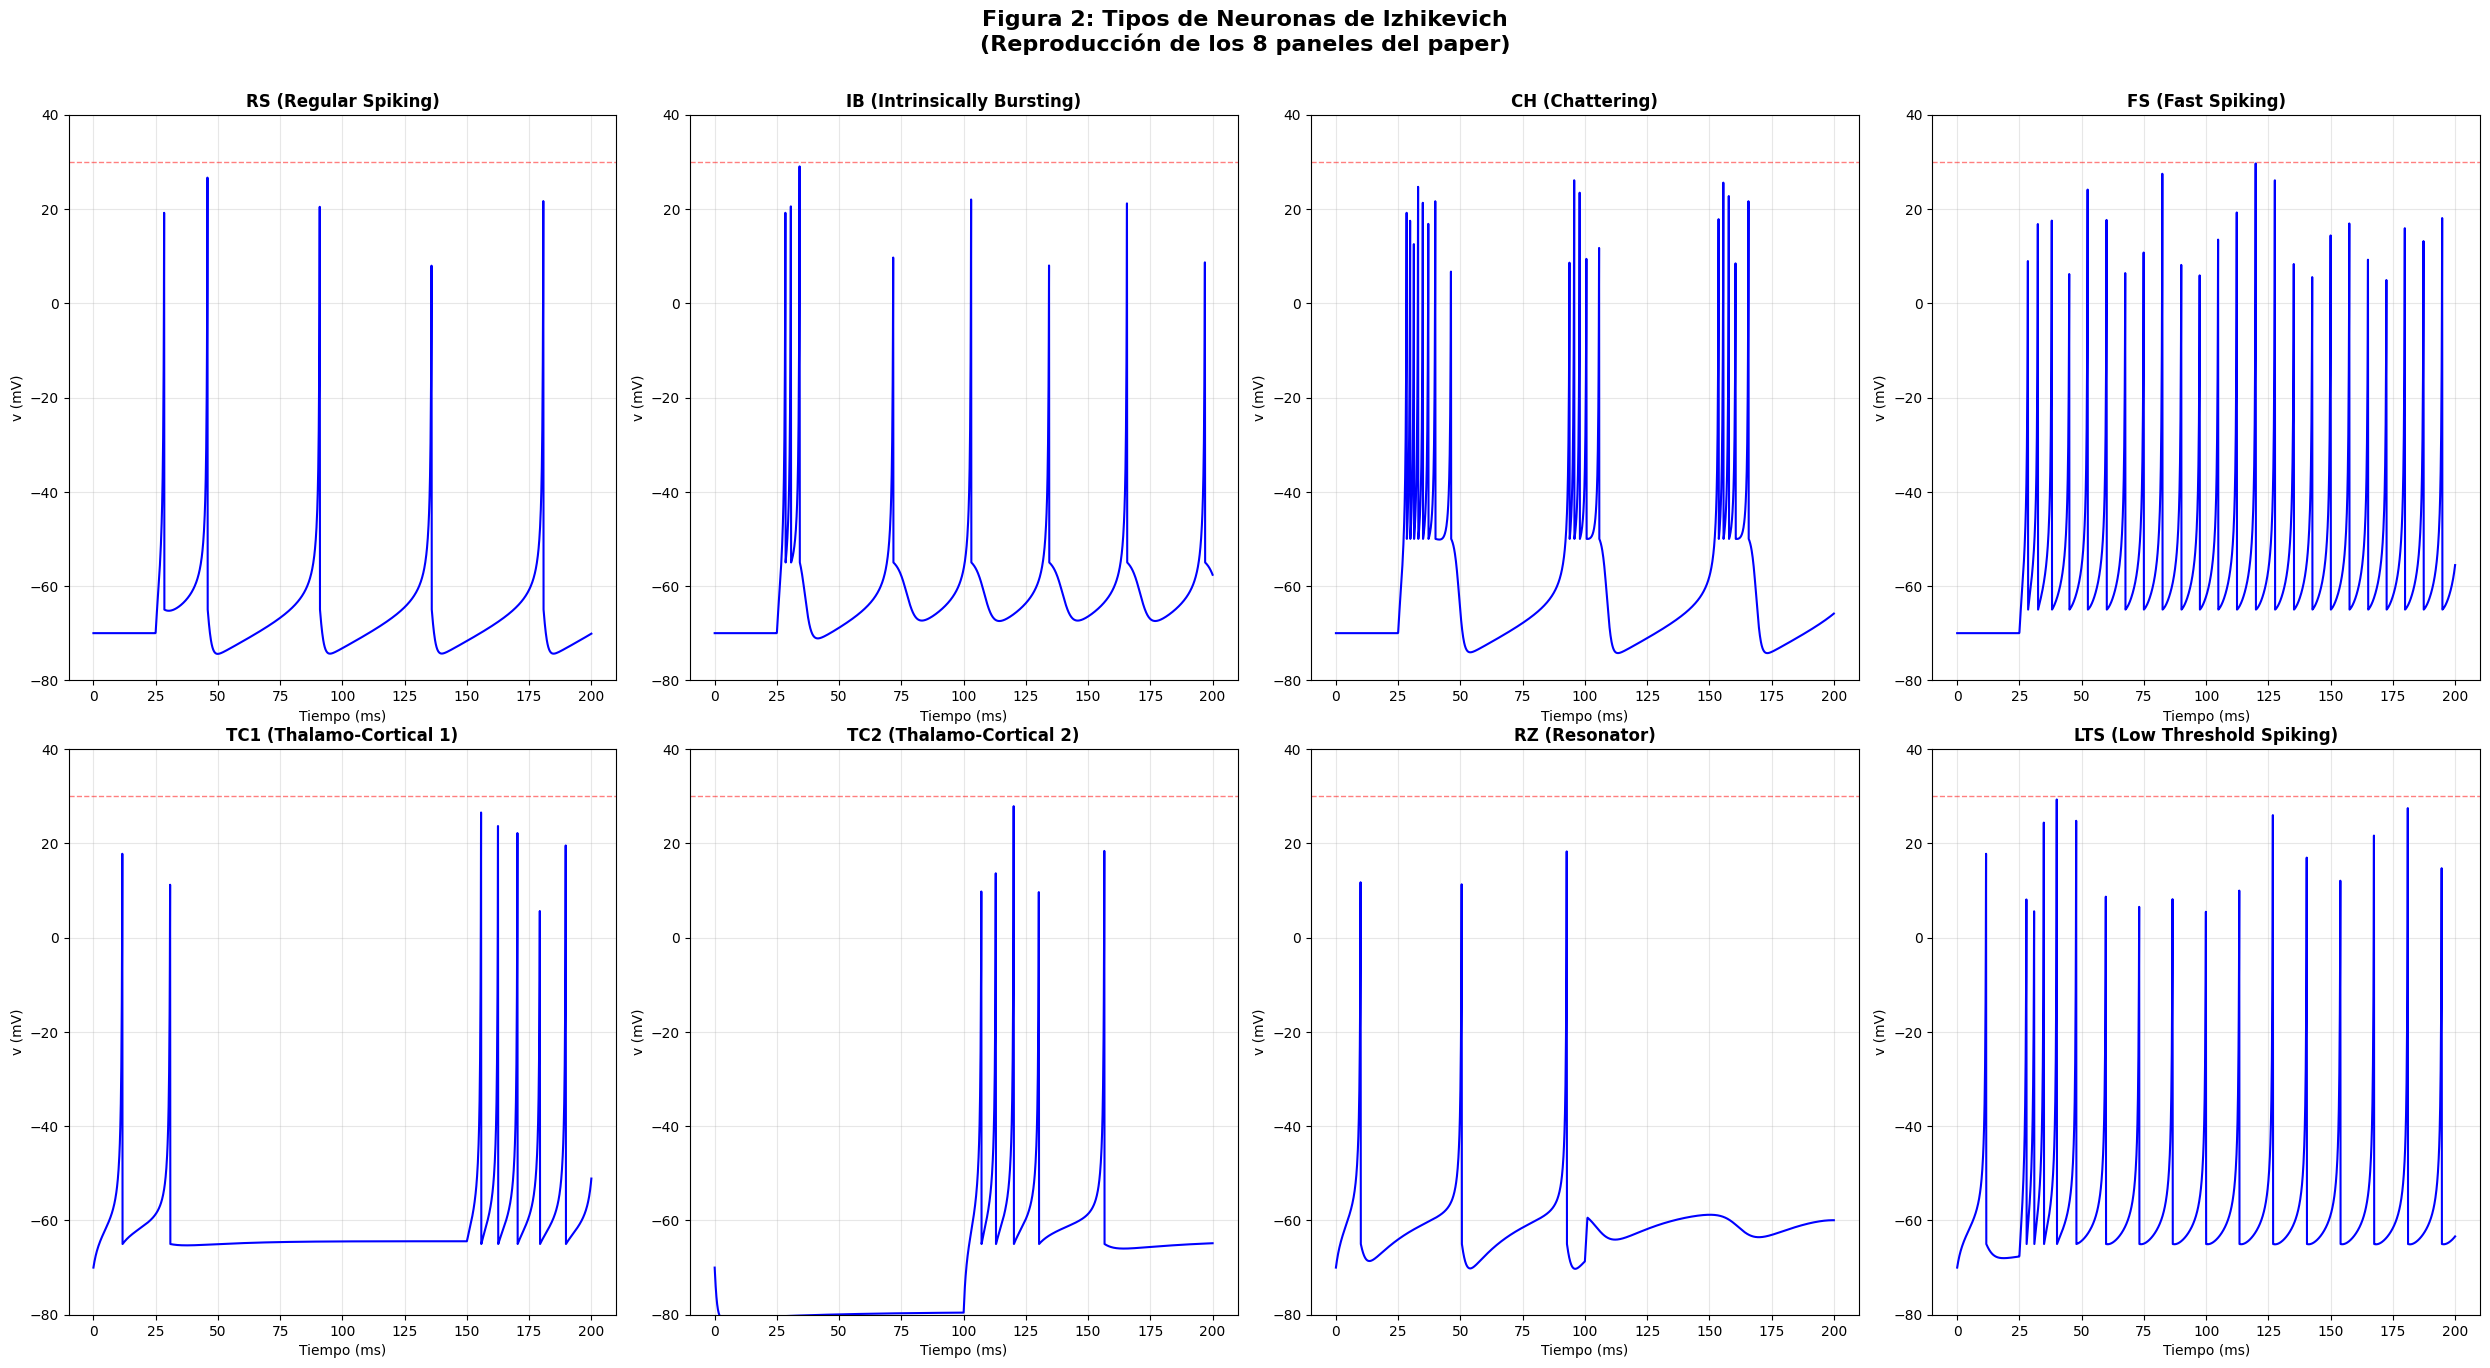


RESUMEN DE SIMULACIONES COMPLETADAS
✓ 8 tipos de neuronas simuladas exitosamente
✓ Parámetros según Tabla 1 del paper de Izhikevich
✓ Tiempo de simulación: 0-200 ms
✓ Paso de integración: h = 0.1 ms
✓ Método: Runge-Kutta 4to orden con reseteo


In [9]:
# Código de reproducción de los 8 paneles de la figura 2 del paper
# Usando las definiciones ya existentes de p_simulaciones

# Nombres descriptivos para los tipos de neuronas
neuron_names = {
    "RS": "RS (Regular Spiking)",
    "IB": "IB (Intrinsically Bursting)", 
    "CH": "CH (Chattering)",
    "FS": "FS (Fast Spiking)",
    "TC1": "TC1 (Thalamo-Cortical 1)",
    "TC2": "TC2 (Thalamo-Cortical 2)",
    "RZ": "RZ (Resonator)",
    "LTS": "LTS (Low Threshold Spiking)"
}

# Crear figura con 8 subplots (2x4)
fig, axes = plt.subplots(2, 4, figsize=(25, 15))
axes = axes.flatten()  # Convertir a array 1D para facilitar la indexación

# Parámetros de simulación
t_start = 0
t_end = 200
h = 0.1
k = int((t_end - t_start) / h)

# Simular cada tipo de neurona usando p_simulaciones ya definido
for idx, (tipo, params) in enumerate(p_simulaciones.items()):
    # Condición inicial
    v0 = -70
    u0 = params[4] * v0  # u(0) = c*v(0)
    x0 = np.array([v0, u0])
    
    # Ejecutar la integración
    t, w = integrador_ode(rk4, izhikevich_model, x0, t_start, t_end, k, params, reset_condition)
    
    # Extraer v(t)
    v_t = w[0, :]
    
    # Plotear en el subplot correspondiente
    axes[idx].plot(t, v_t, 'b-', linewidth=1.5)
    axes[idx].set_title(neuron_names[tipo], fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Tiempo (ms)', fontsize=10)
    axes[idx].set_ylabel('v (mV)', fontsize=10)
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_ylim(-80, 40)  # Rango fijo para comparar mejor
    
    # Añadir línea horizontal en el umbral de disparo
    axes[idx].axhline(y=30, color='r', linestyle='--', alpha=0.5, linewidth=1)
    
    print(f"Simulación completada para {neuron_names[tipo]}")

# Ajustar layout
plt.tight_layout()
plt.suptitle('Figura 2: Tipos de Neuronas de Izhikevich\n(Reproducción de los 8 paneles del paper)', 
             fontsize=16, fontweight='bold', y=0.95)
plt.subplots_adjust(top=0.88, bottom=0.08)  # Dar más espacio entre título y plots

# Guardar la figura en la carpeta images
fig.savefig('images/panel_8_neuronas.png', dpi=300, bbox_inches='tight')
print("✓ Imagen guardada como: images/panel_8_neuronas.png")

plt.show()

print("\n" + "="*80)
print("RESUMEN DE SIMULACIONES COMPLETADAS")
print("="*80)
print("✓ 8 tipos de neuronas simuladas exitosamente")
print("✓ Parámetros según Tabla 1 del paper de Izhikevich")
print("✓ Tiempo de simulación: 0-200 ms")
print("✓ Paso de integración: h = 0.1 ms")
print("✓ Método: Runge-Kutta 4to orden con reseteo")
print("="*80)

## **Ejercicio 3)** Red de neuronas de Izhikevich

### El método de Euler-Maruyama

Nos interesa resolver una Ecuación Diferencial Estocástica (SDE) de la forma

$$dX_t = f(X_t,t)dt + g(X_t,t)dW_t\;\;\;\; (1)$$

donde, para cada $t\in \mathbb{R}$, las variables $X_t,W_t$ son estocásticas con soporte en $\mathbb{R}$, y $f,g \in (\mathbb{R}^2\to \mathbb{R})$ son funciones relativamente arbitrarias.
Como función de $t$, asuminos que $W_t$ describe un proceso de Wiener. Es decir, asumimos que

1. $W_t$ es una variable estocástica normalmente distribuida de valor esperado $\langle W_t \rangle = 0$ y varianza $\langle (W_t-\langle W_t\rangle)^2 \rangle = \langle W_t^2 \rangle = wt$ para algún $w\geq 0$, y

2. las variables estocásticas $W_{t+s}-W_s$ (caminatas futuras) y $W_s$ (caminatas pasadas) son estadísticamente independientes para todo $t\geq 0$ y $s\leq t$.

Nos interesa resolver la Ec. (1) en un intervalo $t\in [0,T]$ para una condición inicial $X_0=x_0$.

El método de Euler-Maruyama provee una aproximación $Y_t \approx X_t$ para $t\in \{0,\tau,2\tau,...,T\}$ donde $\tau=T/N$ para algún $N\gg 1$ fijo, y viene dado por la cadena de Markov

$$Y_{t+\tau} = Y_t + f(Y_t,t)\tau + g(Y_t,t)w\sqrt{\tau}\mathcal{N}\;\;\;\; (2)$$

donde $Y_0=x_0$ y $\mathcal{N}$ es una variable aleatoria normalmente distribuida de valor esperado $0$ y varianza $1$.

#### Caso multidimensional

El caso multidimensional es de la forma

$$dX_t = f(X_t,t)dt + g(X_t,t)dW_t\;\;\;\; (4)$$

donde $X_t,f(X_t,t) \in \mathbb{R}^d$, $g(X_t,t)\in \mathbb{R}^{d\times m}$ y $W_t\in \mathbb{R}^m$ para $d,m \in \mathbb{N}$.

En componentes

$$dX_{it} = f_i(X_t,t)dt + \sum_{j=1}^m g_{ij}(X_t,t)dW_{jt}\;\;\;\; (5)$$

Luego, la aproximación de Euler Maruyama toma la forma

$$Y_{i,t+\tau} = Y_{it} + f_i(Y_t,t)\tau + \sum_{j=1}^m g_{ij}(Y_t,t)w_j\sqrt{\tau}\mathcal{N}_j\;\;\;\; (6)$$

donde $\mathcal{N}_1,...,\mathcal{N}_m$ son variables aleatorias independientes, normalmente distribuidas, de valor esperado 0 y varianza 1.

### Red neuronal de Izhikevich

El modelo de neurona de Izhikevich es una Ecuación Diferencial Ordinaria (ODE), por lo que no hay estocasticidad.

Para simular una red, Izhikevich propone acoplar un sistema de neuronas con señales de ruido, tornando la ODE en una SDE.
Concretamente, propone acoplar $n_e$ neuronas exitatorias y $n_i$ neuronas inhibitorias mediante una matriz de interacciones $a_{ij}$ con $i,j\in \{1,2,...,n\}$ para $n:=n_e+n_i$ utilizando la ODE

\begin{align}
\dot{v}_i(t) & = &=  g_2v_i^2(t) + g_1v_i(t) + g_0 - u_i(t) + \sum_{j=1}^n a_{ij} \Theta(v_j(t)) \;\;\;\; (7) \\
\dot{u}_i(t) & = &=  b_i(c_iv_i(t)-u_i(t))
\end{align}

donde $I_i(t) = \sum_{j=1}^n a_{ij} \Theta(v_j(t))$ representa el input externo afectando a la neurona $i$.
Se utiliza $a_{ij}=\frac{1}{2}r_{ij}$ para todo $i$ y $j=1,...,n_e$ y $a_{ij}=-r_{ij}$ para todo $i$ y $j=n_e+1,...,n$, donde los $r_{ij}$ son valores aleatorios tomados de la distribución uniforme en $[0,1]$.
Aquí, la función escalón de Heaviside, la cual satisface $\Theta(x)=1$ si $x>0$ y $\Theta(x)=0$ en caso contrario, es utilizada para normalizar la señal de disparo de las neuronas de entrada.
El disparo de la $i$-ésima neurona se implementa aplicando la condición de reseteo

\begin{align}
v_i(t) &\leftarrow& v_{i-} \\
u_i(t) &\leftarrow& u_i(t) + \Delta u_i \\
\end{align}

cuando $v_i(t) \geq v_{i+}$.
Los valores de los parámetros para las variables exitatorias son son $b_i=0.02$, $c_i=0.2$, $v_{i-} = -64+15r_i^2$ y $\Delta u_i = 8-6r_i^2$, donde $R_i$ es la realización de una variable aleatoria definida uniformemente en el intervalo $[0,1]$.
Mientras que para las variables inhibitorias son $b_i=0.02+0.08r_i$, $c_i=0.25-0.05r_i$, $v_{i-} = -65$ y $\Delta u_i = 2$.
Esto introduce heterogeneida en el sistema, y la idea es que los límites $r_i=0$ corresponde neuronas que disparan regularmente, mientras que $r_i=1$ a neuronas *parloteantes*.

Luego, Izhikevich incorpora un ruido estocástico $dW_i(t)$ a la señal de entrada $I_i(t)$, transformando el sistema de ODEs en un sistema de SDEs en donde las variables $v_i(t)$ y $u_i(t)$ se convierten en variables estocásticas $V_{it}$ y $U_{it}$, respectivamente.
De esta manera, en la aproximación de Euler-Maruyama, la Ec. (7) adopta la forma

\begin{align}
dV_{it} & = &=  \bigg(g_2V_{it}^2 + g_1V_{it} + g_0 - U_{it} + \sum_{j=1}^n a_{ij} \Theta(V_{it})\bigg)dt + dW_{it} \;\;\;\; (8) \\
dU_{it} & = &=  b_i(c_iV_{it}-U_{it})dt
\end{align}

donde $dW_{it}$ representa el ruido estocástico Gaussiano $dW_i(t)$ anteriormente mencionado.
El sistema de SDEs de la Ec. (8) corresponde al sistema de la Ec. (5) cuando:

1. $X_{it} = V_{it}$,

2. $X_{i+n,t} = U_{it}$,

3. $f_i(X_t,t) = g_2X_{it}^2 + g_1X_{it} + g_0 - X_{i+n,t} + \sum_{j=1}^n a_{ij} X_{it}$,

4. $f_{i+n}(X_t,t) = b_i(c_iX_{it}-X_{i+n,t})$,

para todo $i=1,...,n$ y

5. $g_{rs}(X_t,t) = 1$ si $r=s\leq n$ y $g_{rs}(X_t,t) = 0$ en caso contrario.

### Refs.

* https://en.wikipedia.org/wiki/Euler%E2%80%93Maruyama_method
* https://ipython-books.github.io/134-simulating-a-stochastic-differential-equation/

* https://github.com/mattja/sdeint/blob/master/sdeint/integrate.py

* https://diffeq.sciml.ai/stable/tutorials/sde_example/

**1)** Adapte el código en Matlab del paper de Izhikevich a código en Python.

**2)** Acomode el código anterior a la teoría mencionada remplazando la función escalón $\Theta$ de Heavised por la función

$$
z(v)=\frac{87+v}{450}-0.0193
$$

**3)** Reproduzca la figura 3 del paper. Sugerencia, compartimentabilice el código en funciones, identificando las distintas componentes mencionadas en la teoría.

In [10]:
# 3.1)